![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
# **<center>Projet Processus Stochastiques</center>**
<center>CHOUKROUN Julien - GOURDON Jessica - SAGNES Luc</center>


---

On considère la marche aléatoire semi-réfléchie sur {1,2,...,N}.

Concrètement, on choisit au hasard une position initiale entre 1 et N.

On se déplace de façon équiprobable de $+1$ ou $-1$. Si on est dans les états 1 ou N, on peut soir rester dans cet état soit repartir vers l'état voisin de manière équiprobable.

On note $X_n$ la position où l'on se trouve après $n$ étapes.

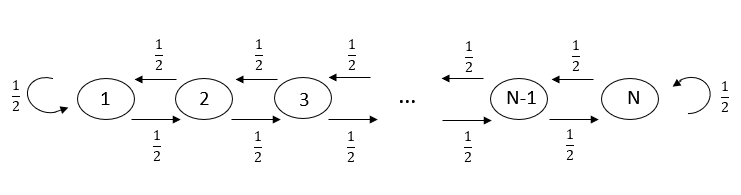

In [ ]:
install.packages('markovchain')
library(markovchain)
install.packages('diagram')
library(diagram)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



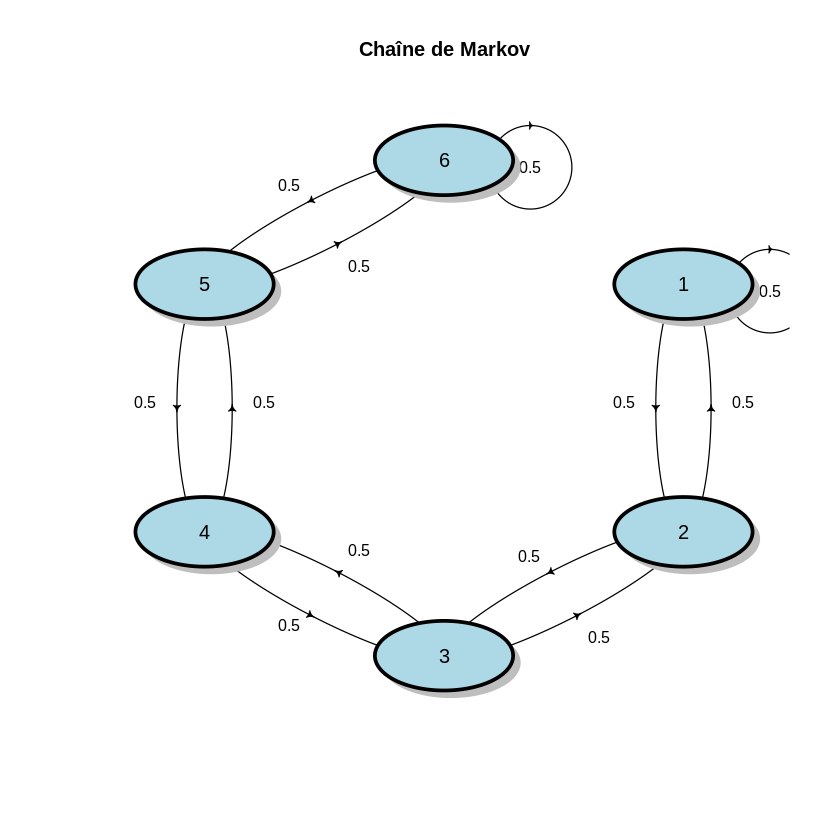

In [ ]:
transitionMatrice <- matrix(c(0.5,0.5,0,0,0,0,
                0.5,0,0.5,0,0,0,
                0,0.5,0,0.5,0,0,
                0,0,0.5,0,0.5,0,
                0,0,0,0.5,0,0.5,
                0,0,0,0,0.5,0.5),nrow = 6, byrow = TRUE)
                nomEtat <- c("1","2","3","4","5","6")
row.names(transitionMatrice) <- nomEtat; colnames(transitionMatrice) <- nomEtat
plotmat(transitionMatrice,lwd = 1, box.lwd = 3, 
        cex.txt = 0.8, 
        box.size = 0.1, 
        box.type = "circle", 
        box.prop = 0.5,
        box.col = "light blue",
        arr.length=.1,
        arr.width=.1,
        self.cex = .6,
        self.shifty = -.01,
        self.shiftx = .125,
        main = "Chaîne de Markov")

### Montrer que $X_n$ est une chaîne de Marvok et donner sa matrice de transition

Soient $  \left(x_0,x_1,\dots,x_n,y\right) \in $ {1,2,...,N} avec n $\geq $ 1

Montrons par récurrence que :

$ \forall n \geq 1, P(X_{n+1}=y | X_{n}=x_n, ... , X_{0}=x_0) = P(X_{n+1}=y | X_{n}=x_n)$

On vérifie pour n=1 :

 $ P(X_{2}=y | X_{1}=x_1,X_{0}=x_0) \\  
  = \frac{P(X_{2}=y, X_{1}=x_1,X_{0}=x_0)}{P(X_{1}=x_1,X_{0}=x_0)} \\
  =  \frac{P(X_{2}=y, X_{1}=x_1)\times P(X_0=x_0)}{P(X_{1}=x_1,X_{0}=x_0)} $

car les $X_i$ sont indépendants


  $= \frac{P(X_{2}=y, X_{1}=x_1)\times P(X_0=x_0)}{P(X_{1}=x_1) \times P(X_{0}=x_0)} \\
  = \frac{P(X_{2}=y, X_{1}=x_1)}{P(X_{1}=x_1)} \\
  = P(X_{2}=y| X_{1}=x_1)$

On suppose la propriété vraie au rang n,

Montrons-là au rang n+1

 $  P(X_{n+2}=z | X_{n+1}=y,X_{n}=x_n, ... , X_{0}=x_0) \\
 = \frac{P(X_{n+2}=z, X_{n+1}=y,X_{n}=x_n,...,X_{0}=x_0)}{P(X_{n+1}=y,X_{n}=x_n,...,X_{0}=x_0)} $

 car les $ X_i$ sont indépendants

 $=\frac{P(X_{n+2}=z)}{P(X_{n+1}=y)} \times \frac{P( X_{n+1}=y,X_{n}=x_n,...,X_{0}=x_0)}{P(X_{n}=x_n,...,X_{0}=x_0)} \\
 =\frac{P(X_{n+2}=z)}{P(X_{n+1}=y)} \times P(X_{n+1}=y | X_{n}=x_n, ... , X_{0}=x_0) $

 Hypothèse de récurrence :

 $= \frac{P(X_{n+2}=z)}{P(X_{n+1}=y)} \times P(X_{n+1}=y | X_{n}=x_n) \\
 = \frac{P(X_{n+2}=z)}{P(X_{n+1}=y)} \times \frac{P(X_{n+1}=y , X_{n}=x_n)}{P(X_n=x_n)} \\
 =\frac{P(X_{n+2}=z,X_{n+1}=y,X_n=x_n)}{P(X_{n+1}=y,X_n=x_n)} $

 car les $X_i$ sont indépendantes
 
 $=\frac{P(X_{n+2}=z,X_{n+1}=y) \times P(X_n=x_n)}{P(X_{n+1}=y,X_n=x_n)} \\
 = \frac{P(X_{n+2}=z,X_{n+1}=y)}{P(X_{n+1}=y)} \\
 = P(X_{n+2}=z| X_{n+1}=y)$


Conclusion :
$\forall n \geq 1,P(X_{n+1}=y | X_{n}=x_n, ... , X_{0}=x_0) = P(X_{n+1}=y | X_{n}=x_n)$

Donc, ($X_n$) est une chaine de Markov.


Exemple de matrice de transition : cas simple : N=3 :


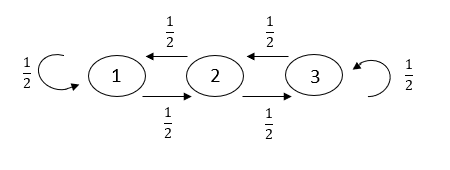


$ P = \begin{pmatrix} 
1/2 & 1/2 & 0  \\
1/2 & 0 & 1/2 \\
0 & 1/2 & 1/2  
\end{pmatrix} $


 Explication pour la 1e ligne :

$P(X_{n+1}=1 | (X_{n}=1 )=1/2 $

car en étant en 1, on peut soit y rester soit aller en 2 avec la même probabilité

$P(X_{n+1}=2 | (X_{n}=1 )=1/2 $

car en étant en 1, on peut soit y rester soit aller en 2 avec la même probabilité

$P(X_{n+1}=3 | (X_{n}=1 )=0 $

car on ne peut pas passer de 1 à 3 directement
 
 Pour la 2e ligne :

 $P(X_{n+1}=1 | (X_{n}=2 )=1/2 $

car en étant en 2 on peut soit aller en 1 soit aller en 3 avec la même probabilité


 $P(X_{n+1}=2 | (X_{n}=2 )=0 $

 car en étant en 2, on ne peut pas rester en 2

 $P(X_{n+1}=3 | (X_{n}=2 )=1/2 $

car en étant en 2 on peut soit aller en 1 soit aller en 3 avec la même probabilité


$ P = \begin{pmatrix} 
1/2 & 1/2 & 0 & 0 & \cdots & 0 & 0 \\
1/2 & 0 & 1/2 & 0 & \cdots & 0 & 0 \\
0 & 1/2 & 0 & 1/2 & \cdots & 0 & 0 \\
0 & 0 & 1/2 & 0 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & 0 & 1/2 \\
0 & 0 & 0 & 0 & \cdots & 1/2 & 1/2
\end{pmatrix} $

Explication pour la 1e ligne :

 $P(X_{n+1}=1 | (X_{n}=1 )=1/2 $

 car en étant en 1, on peut soit rester en 1 soit aller en 2 avec la même probabilité

  $P(X_{n+1}=2 | (X_{n}=1 )=1/2 $
 
 car en étant en 1, on peut soit rester en 1 soit aller en 2 avec la même probabilité

  $P(X_{n+1}=3 | (X_{n}=1 )=0 $

  car on ne peut pas passer de 1 à 3 directement

   .
   .
   .

   $P(X_{n+1}=N | (X_{n}=1 )=0 $

  car on ne peut pas passer de 1 à N directement

  Pour la 2e ligne :

  $P(X_{n+1}=1 | (X_{n}=2 )=1/2 $

car en étant en 2 on peut soit aller en 1 soit aller en 3 avec la même probabilité


 $P(X_{n+1}=2 | (X_{n}=2 )=0 $

 car en étant en 2, on ne peut pas rester en 2

 $P(X_{n+1}=3 | (X_{n}=2 )=1/2 $

car en étant en 2 on peut soit aller en 1 soit aller en 3 avec la même probabilité

 $P(X_{n+1}=4 | (X_{n}=2 )=0 $

  car on ne peut pas passer de 2 à 4 directement

   .
   .
   .

   $P(X_{n+1}=N | (X_{n}=2 )=0 $

  car on ne peut pas passer de 2 à N directement

  Pour la Ne ligne:

  $P(X_{n+1}=1 | (X_{n}=N )=0 $

  car on ne peut pas passer de N à 1 directement

  .
  .
  .

 $P(X_{n+1}=N-2 | (X_{n}=N )=0 $

  car on ne peut pas passer de N à N-2 directement

   $P(X_{n+1}=N-1 | (X_{n}=N )=1/2 $

  car en étant en N on peut soit rester en N soit aller en N-1 avec la même probabilité

  $P(X_{n+1}=N | (X_{n}=N )=1/2 $

  car en étant en N on peut soit rester en N soit aller en N-1 avec la même probabilité


### Tracer une trajectoire de $X_n$ jusqu'à l'instant $n = 15$

In [ ]:
# Simule une trajectoire de la chaîne de Markov selon la matrice de transition P
trajectoire <- function(P, nbIteration = 15) {
  # Stocke les états X_t dans le temps : ici on crée un vecteur de 15 éléments
  etats <- rep(0,times=nbIteration)
  # Initialisation du premier état : on part de 1
  etats[1] <- 1
  for(t in 2:nbIteration) {
    # Vecteur de probabilité pour simuler le prochain état X_{t+1} 
    # Cela prend la ligne de la matrice de transition de l'état précédent
    p <- P[etats[t-1], ]
    # On utilise la loi multinomiale pour déterminer les états 
    etats[t] <- which(rmultinom(1, 1, p) == 1)
  }
  return(etats)
}

In [ ]:
# Matrice de transition
P <- matrix(c(0.5,0.5,0,0,0,0,
              0.5,0,0.5,0,0,0,
              0,0.5,0,0.5,0,0,
              0,0,0.5,0,0.5,0,
              0,0,0,0.5,0,0.5,
              0,0,0,0,0.5,0.5), nrow = 6, byrow = TRUE)

nbChaine <- 5 # Nombre d'observation
nbIteration <- 15

# On crée une matrice où chaque colonne stocke les valeurs d'une trajectoire de la chaîne de Markov
etatsChaine <- matrix(NA, ncol=nbChaine, nrow=nbIteration)

# Simulation des trajectoires
for(c in seq(1:nbChaine)) {
  etatsChaine[,c] <- trajectoire(P)
}
etatsChaine

1,1,1,1,1
2,1,1,2,2
1,2,2,1,1
2,3,1,2,2
1,4,1,1,1
2,3,2,2,2
1,2,1,1,1
1,1,1,2,2
2,1,1,3,3
1,2,1,2,4
2,3,2,1,5


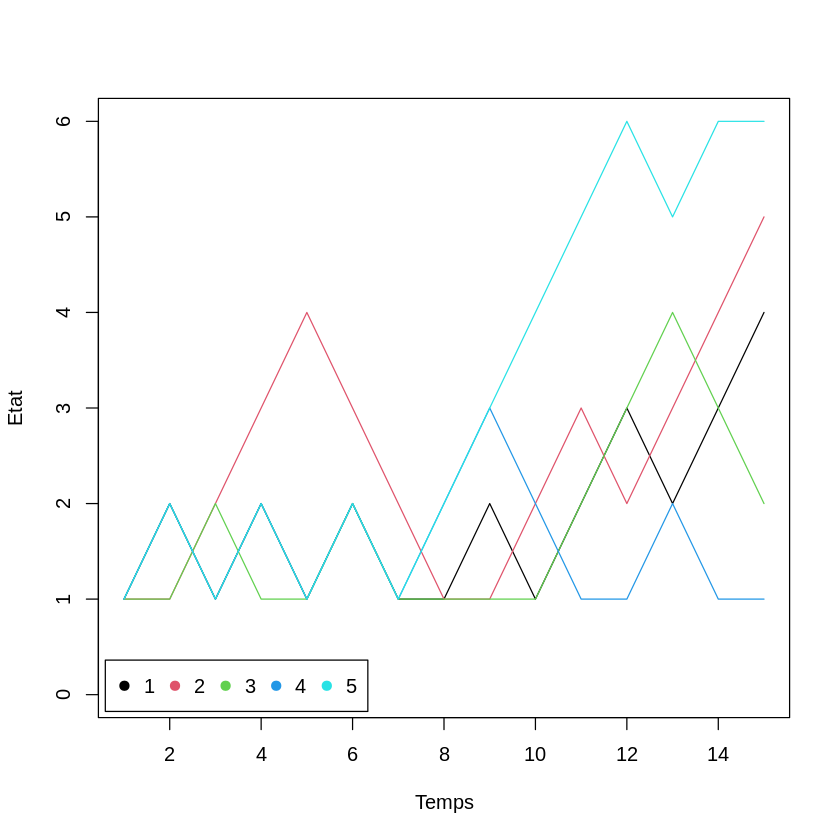

In [ ]:
# Affichage graphique de la trajectoire avec matplot pour dessiner plusieurs ensembles d'observations à partir du même objet
matplot(etatsChaine, type='l', lty=1, col=1:5, ylim=c(0,6), ylab='Etat', xlab='Temps')
legend("bottomleft", inset=0.01, legend=c(1:5), col=c(1:5), pch=19, horiz=TRUE)

Pour tracer une trajectoire, on peut aussi utiliser la librairie "markovchain" déjà existante qui permet de créer de une chaîne de markov et de simuler une trajectoire.

In [ ]:
install.packages('markovchain')
library(markovchain)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Matrice de transition
transitionMatrice <- matrix(c(0.5,0.5,0,0,0,0,
                             0.5,0,0.5,0,0,0,
                             0,0.5,0,0.5,0,0,
                             0,0,0.5,0,0.5,0,
                             0,0,0,0.5,0,0.5,
                             0,0,0,0,0.5,0.5),nrow = 6, byrow = TRUE)

# Crée une chaîne de Markov
chaine <- new("markovchain", transitionMatrix=transitionMatrice, states=c("1","2","3","4","5","6")) 

In [ ]:
# Simule une trajectoire
rmarkovchain(n = 15, object = chaine, t0 = "1")

[1] "2" "1" "1" "1" "1" "1" "2" "1" "2" "3" "4" "5" "6" "5" "4"

### Déterminer la loi de $X_7$

D'après le cours,
soit ($X_n$) une chaine de Markov de loi initiale $\mu_0$ et de matrice de transistion P. Alors :

$ \forall n \in \mathbb{N}, \mu_n = \mu_0 \times P^n$

Ici, on chosit au hasard une position initiale entre 1 et N.

Alors, $\mu_0$ suit une loi uniforme discrète sur {1,...,N}.

Donc,  $\mu_0 = \left(\frac{1}{N},\frac{1}{N},\dots,\frac{1}{N}\right) $

Donc :
 
 $ X_{7}= \mu_7 = \mu_0 \times P^7$

 avec :

 $\mu_0 = \left(\frac{1}{N}  \frac{1}{N}  \dots  \frac{1}{N}\right) $
 
 et :

 $ P = \begin{pmatrix} 
1/2 & 1/2 & 0 & 0 & \cdots & 0 & 0 \\
1/2 & 0 & 1/2 & 0 & \cdots & 0 & 0 \\
0 & 1/2 & 0 & 1/2 & \cdots & 0 & 0 \\
0 & 0 & 1/2 & 0 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & 0 & 1/2 \\
0 & 0 & 0 & 0 & \cdots & 1/2 & 1/2
\end{pmatrix} $

Posons : N=3

$ X_{7}= \mu_7  \\
=\mu_0 \times P^7 \\
= \left(\frac{1}{3}  \frac{1}{3}  \frac{1}{3}  \right) \times \begin{pmatrix} 
1/2 & 1/2 & 0   \\
1/2 & 0 & 1/2   \\
0 &  1/2 & 1/2
\end{pmatrix}^7 $

Pour calculer $P^7$, on veut diagonaliser P

Calcul des valeurs propres de P:

det(P-$\lambda \times I_3$)= $-\lambda^3+\lambda^2+ \frac{1}{4} \times \lambda-\frac{1}{4}$

On sait que 1 est valeur propre de P, donc grâce à une division euclidienne on a:

det(P-$\lambda \times I_3$)= $(\lambda-1) \times (-\lambda^2+ \frac{1}{4} ) \\
= -(\lambda-1) \times (\lambda-\frac{1}{2})\times (\lambda+\frac{1}{2})$

Donc, Sp(P)={$\frac{-1}{2},\frac{1}{2},1$}

On sait que le vecteur propre associé à la valeur propre 1 est $\left(1,1,1\right)$

On trouve un vecteur propre associé à $-\frac{1}{2}$ égal à $ \left(1,-2,1\right)$

On trouve un vecteur propre associé à $\frac{1}{2}$ égal à $ \left(-1,0,1\right)$

On a donc : $ P=QDQ^{-1}$

avec :

$D= \begin{pmatrix} 
-1/2 & 0 & 0   \\
0 & 1/2 & 0   \\
0 &  0 & 1 \end{pmatrix}$

$Q= \begin{pmatrix} 
1 & -1 & 1   \\
-2 & 0 & 1   \\
1 &  1 & 1 \end{pmatrix}$

$Q^{-1}= \begin{pmatrix} 
1/6 & -1/3 & 1/6   \\
-1/2 & 0 & 1/2   \\
1/3 &  1/3 & 1/3 \end{pmatrix}$

On aura donc :

$P^7=QD^7Q^{-1}\\
=\begin{pmatrix} 
43/128 & 43/128 & 21/64   \\
43/128 & 21/64 & 43/128   \\
21/64 &  43/128 & 43/128
\end{pmatrix}$

D'où :

$X_7= \left(\frac{1}{3}  \frac{1}{3}  \frac{1}{3}  \right) \times \begin{pmatrix} 
43/128 & 43/128 & 21/64   \\
43/128 & 21/64 & 43/128   \\
21/64 &  43/128 & 43/128
\end{pmatrix} \\
=\left(\frac{1}{3}  \frac{1}{3}  \frac{1}{3}  \right)  $

Posons : N=6 

$ X_{7}= \mu_7  \\
=\mu_0 \times P^7 \\
= \left(\frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6}\right) \times \begin{pmatrix} 
1/2 & 1/2 & 0 & 0 & 0 & 0  \\
1/2 & 0 & 1/2 & 0 & 0 & 0  \\
0 & 1/2 & 0 & 1/2 & 0 & 0  \\
0 & 0 & 1/2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 &  0 & 1/2 \\
0 & 0 & 0 & 0 &  1/2 & 1/2
\end{pmatrix}^7 $

Pour calculer $P^7$, on va diagonaliser P à l'aide de R.


In [ ]:
P <- matrix(c(0.5,0.5,0,0,0,0,
              0.5,0,0.5,0,0,0,
              0,0.5,0,0.5,0,0,
              0,0,0.5,0,0.5,0,
              0,0,0,0.5,0,0.5,
              0,0,0,0,0.5,0.5),nrow = 6, byrow = TRUE)

nu0 = c(1/6,1/6,1/6,1/6,1/6,1/6)

Q <- eigen(P)$vectors
D <- diag(eigen(P)$values)
P <- Q %*% D^7 %*% solve(Q)
P

nu0 %*% P # Produit matriciel

0.2734375,0.2734375,0.1640625,0.1640625,0.0625000,0.0625000
0.2734375,0.1640625,0.2734375,0.0625000,0.1640625,0.0625000
0.1640625,0.2734375,0.0625000,0.2734375,0.0625000,0.1640625
0.1640625,0.0625000,0.2734375,0.0625000,0.2734375,0.1640625
0.0625000,0.1640625,0.0625000,0.2734375,0.1640625,0.2734375
0.0625000,0.0625000,0.1640625,0.1640625,0.2734375,0.2734375


0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667


On aura donc :

$P^7=QD^7Q^{-1}\\
=\begin{pmatrix} 
35/128 & 35/128 & 21/128 & 21/128 & 1/16 & 1/16  \\
35/128 & 21/128 & 35/128 & 1/16 & 21/128 & 1/16  \\
21/128 & 35/128 & 1/16 & 35/128 & 1/16 & 21/128  \\
21/128 & 1/16 & 35/128 & 1/16 & 35/128 & 21/128 \\
1/16 & 21/128 & 1/16 & 35/128 &  21/128 & 35/128 \\
1/16 & 1/16 & 21/128 & 21/128 &  35/128 & 35/128
\end{pmatrix}$

D'où :

$X_7= \left(\frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6} \frac{1}{6}\right) \times \begin{pmatrix}
35/128 & 35/128 & 21/128 & 21/128 & 1/16 & 1/16  \\
35/128 & 21/128 & 35/128 & 1/16 & 21/128 & 1/16  \\
21/128 & 35/128 & 1/16 & 35/128 & 1/16 & 21/128  \\
21/128 & 1/16 & 35/128 & 1/16 & 35/128 & 21/128 \\
1/16 & 21/128 & 1/16 & 35/128 &  21/128 & 35/128 \\
1/16 & 1/16 & 21/128 & 21/128 &  35/128 & 35/128
\end{pmatrix} \\
= \left(\frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6}  \frac{1}{6} \frac{1}{6}\right) $

Par identification, on peut dire que :
 
 $\forall N \geq 2, X_7=\left(\frac{1}{N},\frac{1}{N},\dots,\frac{1}{N}\right) $

Pour confirmer nos résultats, on peut utiliser la librairie "markovchain".

In [ ]:
# Cette fonction retourne le vecteur de la loi de Xn
steadyStates(chaine)

1,2,3,4,5,6
0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667


### La chaîne est-elle irréductible, récurrente, périodique ?

Soit E l'espace des états.

Ici, E est un ensemble clos et irréductible car il est impossible d'en sortir et tous ces états communiquent.

On en déduit que E est une classe de récurrence.

Puisque E n'est constituée que d'une seule classe de récurrence, alors la chaîne de Markov est irréductible. De plus, on peut dire que cette chaîne est récurrente, et tous les états ont même période. La période est de 1 car pour l'état i=1 ou n, $P_{ii} > 0$. De plus, à l'état 1 et à l'état N, on a une probabilité non nulle de rester sur cet état.

On en déduit donc que la chaîne de Markov est apériodique.


### Possède t'elle une loi invariante ?

Il faut trouver $\Pi$ tel que $\Pi$ * $P$ = $\Pi$

D'après le cours, on a que toute matrice de transition possède au moins une loi invariante. Notre chaine possède donc au moins une loi invariante.

De plus, comme notre chaine de Markov est irréductible, on a unicité de la loi invariante. Il existe donc une unique loi invariante pour notre chaine puisque d'après la question précédente, cette dernière est irréductible apériodique. 



### Y-a t'il convergence en loi de la chaîne et illustrer votre réponse

Puisque la chaîne de Markov est irréductible et apériodique de la loi invariante $\Pi$, alors : $\forall{i,j} \in E, P_{i,j}^{(n)} \underset{n \to +\infty}{\overset{}{\longrightarrow}} \Pi_{j}$

En particulier, on a que : pour toute loi initiale $\mu_0, X_n \underset{\mathcal{L}}{\overset{}{\longrightarrow}} \Pi$

$\mu_0 P^n \underset{n \to +\infty}{\overset{}{\longrightarrow}} \Pi$

Prenons ${N} = 3 $:

On a $ P=QDQ^{-1}$

et  $P^{n} = QD\underbrace{Q^{-1}Q}_{=Id}DQ^{-1}...DQ^{-1}$


D'après la question 3, on a :
$P^{n} = QD^{n}Q^{-1}$

$D^{n}=\begin{pmatrix} 
(-1/2)^{n} & 0 & 0  \\
0 & (1/2)^{n} & 0  \\
0 & 0 & 1  
\end{pmatrix}  \underset{n \to +\infty}{\overset{}{\longrightarrow}} \begin{pmatrix} 
0 & 0 & 0  \\
0 & 0 & 0  \\
0 & 0 & 1  
\end{pmatrix}$

$P^{n} \underset{n \to +\infty}{\overset{}{\longrightarrow}} 
\begin{pmatrix} 
1/3 & 1/3 & 1/3  \\
1/3 & 1/3 & 1/3  \\
1/3 & 1/3 & 1/3  
\end{pmatrix}$

Avec $\mu_0 = (\frac{1}{3},\frac{1}{3},\frac{1}{3})$


$\mu_0P^{n} = (\frac{1}{3},\frac{1}{3},\frac{1}{3})=\mu_0=\Pi$

On en conclut donc qu'il y a convergence en loi de la chaine vers 
$\Pi = (\frac{1}{N},\frac{1}{N},\dots,\frac{1}{N})$

On peut vérifier pour d'autres dimensions avec la librairie "Markovchain" comme à la question 3 pour N=6 où l'on obtient le même résultat.

In [ ]:
N = 7
for (i in 2:N){  
c = rep(0, times=i)
P = diag(c)
P[1,1]=0.5
P[i,i]=0.5
P[row(P) - col(P) == 1] <- P[row(P) - col(P) == -1] <- 0.5

# Crée une chaîne de Markov
chaine <- new("markovchain", transitionMatrix=P)

# Affiche les Π pour les différentes valeurs de N
cat("Π pour N = ", i, " : \n")
cat(steadyStates(chaine), "\n")
}

Π pour N =  2  : 
0.5 0.5 
Π pour N =  3  : 
0.3333333 0.3333333 0.3333333 
Π pour N =  4  : 
0.25 0.25 0.25 0.25 
Π pour N =  5  : 
0.2 0.2 0.2 0.2 0.2 
Π pour N =  6  : 
0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 
Π pour N =  7  : 
0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 0.1428571 
